# Orthogonal matrix and QR decomposition

## 8.1 Orthogonal matrix
- All columns of the matrix are mutually orthogonal.
- Each column has a norm of exactly 1.
- Inverse matrix : Transpose of itself

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# used to create non-regular subplots
import matplotlib.gridspec as gridspec


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size
     

In [9]:
Q1 = np.array([ [1,-1],[1,1] ]) / np.sqrt(2)
Q2 = np.array([ [1,2,2],[2,1,-2],[-2,2,-1] ]) / 3

print( np.round(Q1.T @ Q1,8) ), print(' ')
print( np.round(Q2.T @ Q2,8) )

[[1. 0.]
 [0. 1.]]
 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [8]:
Q2

array([[ 0.33333333,  0.66666667,  0.66666667],
       [ 0.66666667,  0.33333333, -0.66666667],
       [-0.66666667,  0.66666667, -0.33333333]])

## 8.2 Gram-Schmidt process
- 비직교 행렬을 직교 행렬로 변환하는 과정

In [ ]:
# Excercise 2 
# Create the matrix
m = 4
n = 4

A = np.random.randn(m, n)

# initialize 

# the GS algo
for i in range(n) :

    # initialize 
    Q[:, i] = A[:, i]

    # orthogonalize
    a = A[: , i ]
    for j in range(i) : #only to earier cols
        q = Q[:, j]
        Q[:,i]=Q[:,i]-np.dot(a,q)/np.dot(q,q)*q  # 이전 Q의 열 벡터 q에 대해 투영(projection)을 뺴주면 직교 벡터가 됨

        # normalize
        Q[:, i] = Q[:, i]  / np.linalg.norm(Q[:, i])

# 'real' QR decomposition for comparison
Q2, R = np.linalg.qr(A)

# note the possible sign differences.
# seemingly non-zero columns will be 0 when adding
print( np.round( Q-Q2 ,10) ), print(' ')
print( np.round( Q+Q2 ,10) )


[[-0.2503318   1.65383043 -0.19581721  0.83639424]
 [ 0.35860703  0.87929802 -0.12614313  0.38936309]
 [ 0.2317619  -0.3468548   0.0523767   1.46457015]
 [ 0.29384776  0.60940269 -0.05418583 -0.91776717]]
 
[[-1.12013067  0.         -0.53645813  0.21008874]
 [ 1.60461732 -0.          1.16313717  0.27959213]
 [ 1.03703812 -0.         -0.63087568 -0.19807477]
 [ 1.31484653 -0.         -1.37890702 -0.00600864]]


## 8.3 QR decompostion
- 그람 슈미트 과정을 이요해 찾아낸 정규기저벡터를 이용해 행렬을 분해 하는 과정 
- 임의 행렬 A를 직교 행렬 Q와 상삼각 행렬 R로 쪼개는 것
    - 직교 행렬 Q는 길이와 각도를 보존하는 성질이 있어서 계산시 오차가 많이 줄어든다
- 계산을 안정적으로, 쉽게 풀기 위한 도구이며 선형 시스템, 최소제곱법, 고유값 문제에에서 많이 사용됨

In [12]:
A = np.random.randn(6,6)
Q, R = np.linalg.qr(A)

In [13]:
R

array([[-1.92347885, -0.76965004, -1.19509786,  0.17432432,  0.24129128,
        -0.74525435],
       [ 0.        , -1.36471528,  0.92054447, -0.2798861 ,  0.50136458,
         1.29033572],
       [ 0.        ,  0.        , -1.84010046,  0.10060945, -0.09492634,
        -0.70437631],
       [ 0.        ,  0.        ,  0.        ,  2.33032986,  0.13497976,
        -0.52021572],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.98595443,
         0.2621047 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.78332032]])

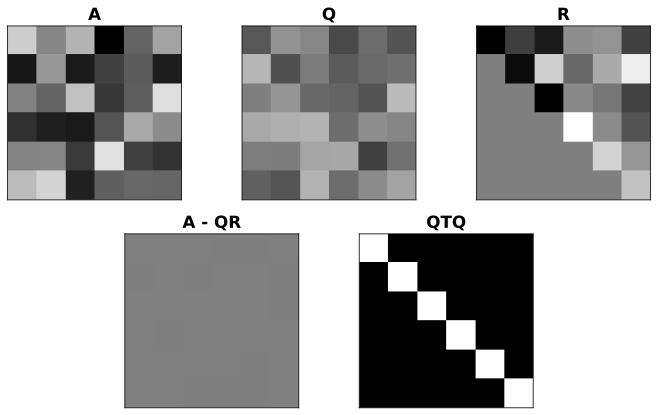

In [15]:
# show the matrices
fig = plt.figure(figsize=(10,6))
axs = [0]*5
c = 1.5 # color limits

gs1 = gridspec.GridSpec(2,6)
axs[0] = plt.subplot(gs1[0,:2])
axs[0].imshow(A,vmin=-c,vmax=c,cmap='gray')
axs[0].set_title('A',fontweight='bold')

axs[1] = plt.subplot(gs1[0,2:4])
axs[1].imshow(Q,vmin=-c,vmax=c,cmap='gray')
axs[1].set_title('Q',fontweight='bold')

axs[2] = plt.subplot(gs1[0,4:6])
axs[2].imshow(R,vmin=-c,vmax=c,cmap='gray')
axs[2].set_title('R',fontweight='bold')

axs[3] = plt.subplot(gs1[1,1:3])
axs[3].imshow(A - Q@R,vmin=-c,vmax=c,cmap='gray')
axs[3].set_title('A - QR',fontweight='bold')

axs[4] = plt.subplot(gs1[1,3:5])
axs[4].imshow(Q.T@Q,cmap='gray')
axs[4].set_title(r'QTQ',fontweight='bold')

# remove ticks from all axes
for a in axs:
  a.set_xticks([])
  a.set_yticks([])

plt.tight_layout()
plt.show()
     

### 8.3.1 Size of Q and R

In [16]:
M = 4
N = 14

A = np.random.randn(M, N)
Q, R = np.linalg.qr(A)

print(f'Size of A (M,N): {A.shape}')
print(f'Size of Q (M,N): {Q.shape}')
print(f'Size of R (M,N): {R.shape}')

Size of A (M,N): (4, 14)
Size of Q (M,N): (4, 4)
Size of R (M,N): (4, 14)


In [ ]:
# illustration of ull Q from M > N A
A = np.array( [ [1, -1] ]).T # (2, 1) 

Q, R = np.linalg.qr(A, 'complete')
Q*np.sqrt(2)

array([[-1.,  1.],
       [ 1.,  1.]])

### 8.3.2. QR decompostion and inverse
- QR 분해 공식을 사용하면 역행렬을 수치적으로 더 안정적으로 게산할 수 있다